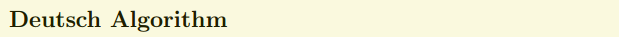

In [ ]:
# The following discription belong to Mikio Nakahara
# Book : Quantum Computing: From linear algebra to Physical realization

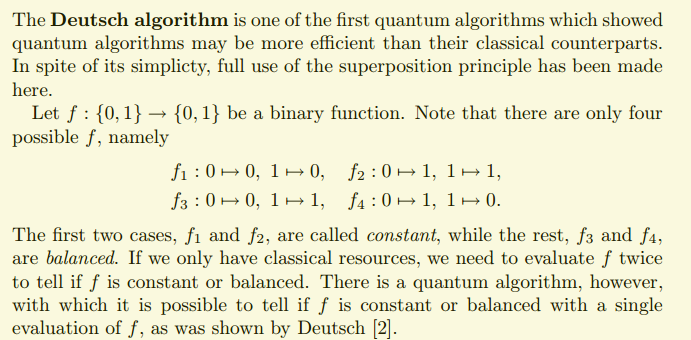

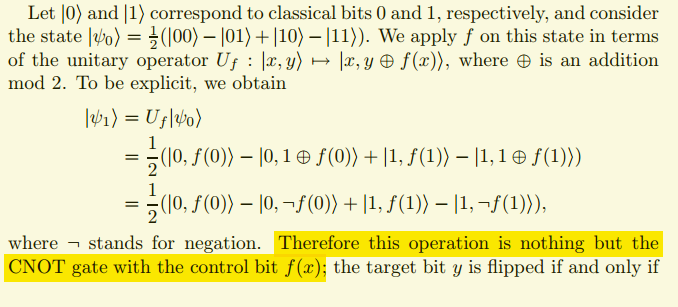

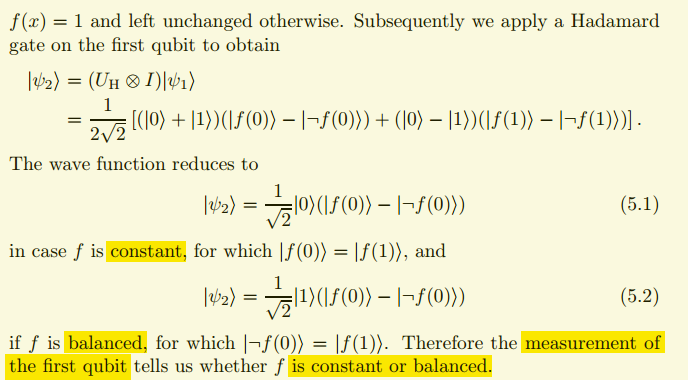

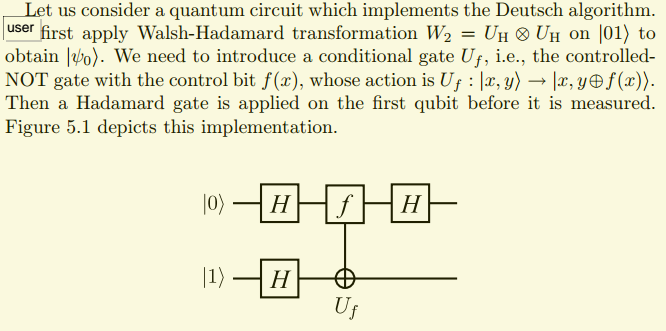

In [1]:
# First of all we have to define a function f for a 2-bit system
# for a 2-bit system possible states are '00','01','10',and '11'.
# which '00' and '11' are constant and '01','10' are balanced.
# for example consider following function

In [2]:
function = '11' # function[0]=f(0) and function[1]=f(1)
n = len(function)

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector

# Step 1: initialization

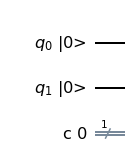

In [4]:
qc = QuantumCircuit(2,1)
qc.draw('mpl',initial_state=True)

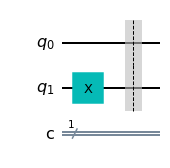

In [5]:
qc.x([1])
qc.barrier()
qc.draw('mpl')

# Step 2: Hadamard gates

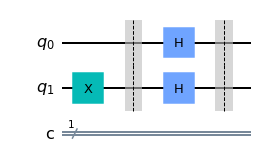

<IPython.core.display.Latex object>

In [6]:
qc.h(range(n))
qc.barrier()
display(qc.draw('mpl'),Statevector(qc).draw('latex'))

# Step 3: Applying Uf gate

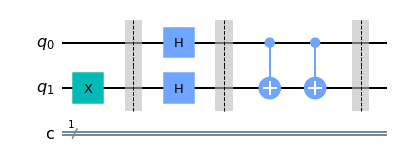

<IPython.core.display.Latex object>

In [7]:
# In this step I applied Uf operator based on the value of our f(x) function:
for j in range(n):
    if function[j]== '0':
        qc.i([j])
    elif function[j]== '1':
        qc.cx([0],[1])

qc.barrier()
display(qc.draw('mpl'),Statevector(qc).draw('latex'))

# Step 5: Hadamard gate 

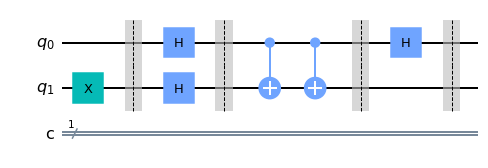

In [8]:
qc.h([0])
qc.barrier()
qc.draw('mpl')

# Step 6: Measurment

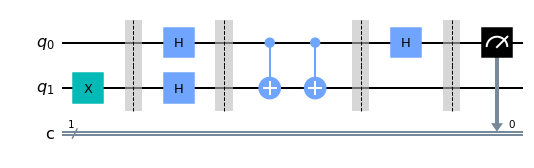

In [9]:
qc.measure([0],[0])
display(qc.draw('mpl'))

In [10]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

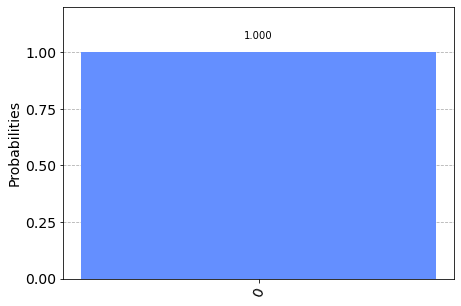

In [11]:
result = QasmSimulator().run(transpile(qc,QasmSimulator()),shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

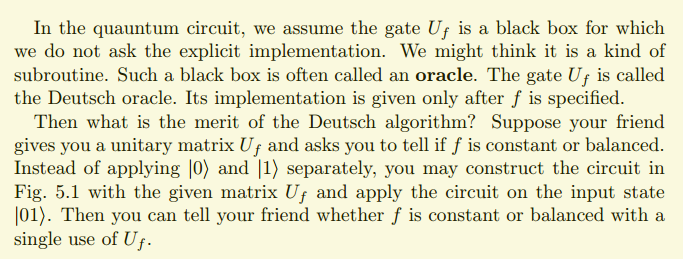

# Deutsh Algorithm in real quantum system

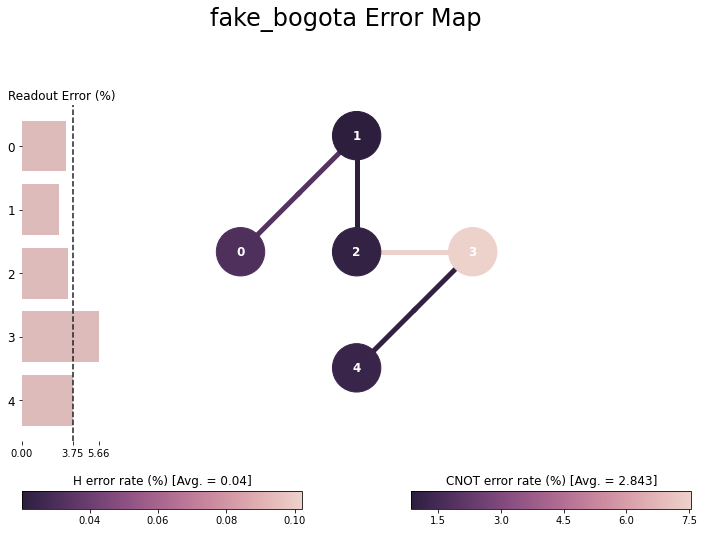

In [15]:
from qiskit.test.mock import FakeBogota
from qiskit.visualization import plot_error_map
plot_error_map(FakeBogota())

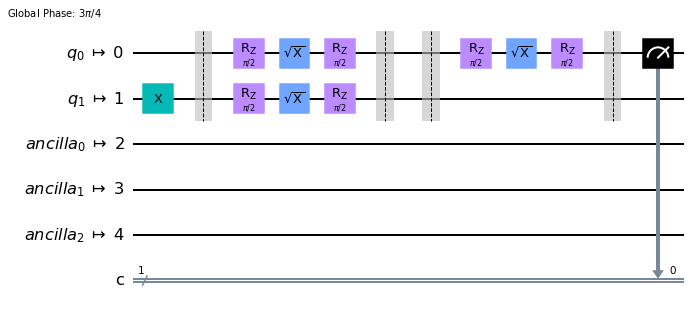

In [16]:
qc2 = transpile(qc,FakeBogota())
qc2.draw('mpl')

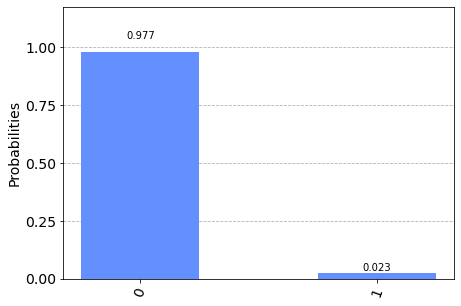

In [17]:
result2 = FakeBogota().run(qc2,shots=1024).result()
counts2 = result2.get_counts()
plot_histogram(counts2)